<a href="https://colab.research.google.com/github/MahamadSahjad/PRODIGY_INFOTECH_DS_TASK04/blob/main/PRODIGY_INFOTECH_DS_TASK04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PRODIGY INFOTECH DS TASK04

## Task
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

**Dataset:** Provided in the link: [Sample Dataset](https://github.com/Prodigy-InfoTech/data-science-datasets/tree/main/Task%204)


In [1]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Set visualization style
sns.set(style="whitegrid")


In [2]:

# Load the dataset (update path or URL as needed)
# Example: dataset.csv should be replaced with the actual dataset file name
df = pd.read_csv("/content/synthetic_social_media_data.csv")

# Display the first few rows
df.head()


,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de


In [4]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing text data (if necessary)
df.dropna(subset=['Post Content'], inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [6]:
# Function to get sentiment polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to classify sentiment
def get_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply functions to dataset
df['Polarity'] = df['Post Content'].apply(get_polarity)
df['Sentiment'] = df['Polarity'].apply(get_sentiment)

# Display updated dataframe
df.head()

,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language,Polarity,Sentiment
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr,0.085119,Positive
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es,0.054545,Positive
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de,-0.018750,Negative
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de,0.033333,Positive
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de,0.100000,Positive


/tmp/ipython-input-3511475107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=['Positive','Neutral','Negative'], palette='viridis')


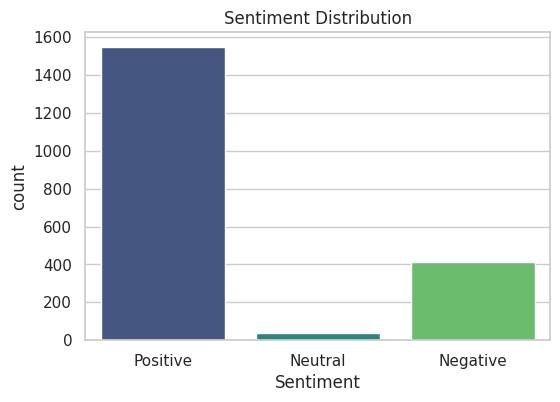

In [7]:

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', order=['Positive','Neutral','Negative'], palette='viridis')
plt.title("Sentiment Distribution")
plt.show()


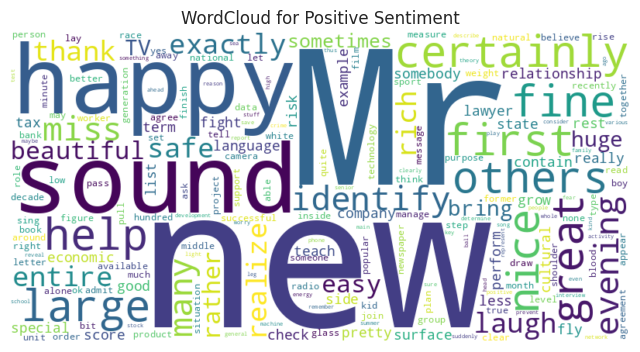

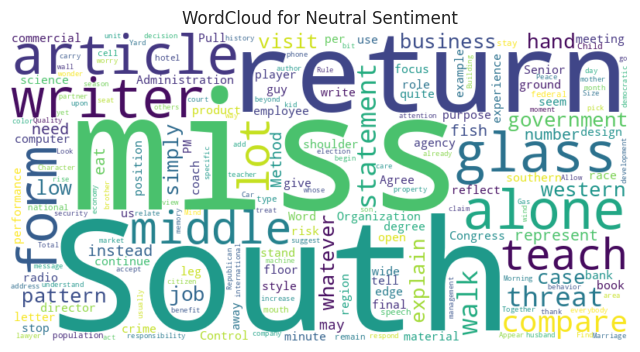

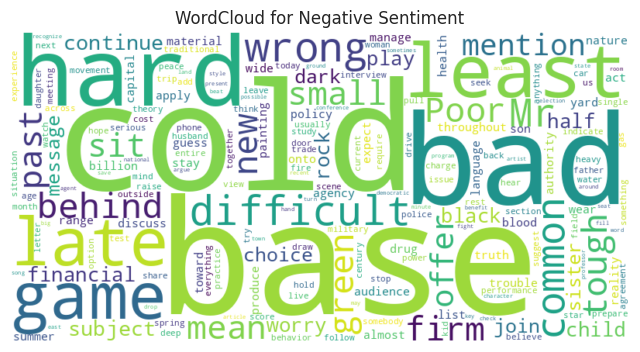

In [9]:
# Generate word clouds for each sentiment
for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = " ".join(review for review in df[df['Sentiment'] == sentiment]['Post Content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Sentiment")
    plt.show()

In [10]:

# Save the processed dataset with sentiments
df.to_csv("processed_sentiment_data.csv", index=False)
print("Processed dataset saved as 'processed_sentiment_data.csv'")


Processed dataset saved as 'processed_sentiment_data.csv'
